# Global Power Plant Database Project

Problem Statement Description -

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database -

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5] country_long (text): longer form of the country designation name (text): name or title of the power plant, generally in Romanized form gppd_idnr (text): 10 or 12 character identifier for the power plant capacity_mw (number): electrical generating capacity in megawatts latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) primary_fuel (text): energy source used in primary electricity generation or export other_fuel1 (text): energy source used in electricity generation or export other_fuel2 (text): energy source used in electricity generation or export other_fuel3 (text): energy source used in electricity generation or export commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available owner (text): majority shareholder of the power plant, generally in Romanized form source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form url (text): web document corresponding to the source field geolocation_source (text): attribution for geolocation information wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database. year_of_capacity_data (number): year the capacity information was reported generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013 generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014 generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015 generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016 generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017 generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018 generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019 generation_data_source (text): attribution for the reported generation information estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013 estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 'estimated_generation_note_2013(text): label of the model/method used to estimate generation for the year 2013estimated_generation_note_2014(text): label of the model/method used to estimate generation for the year 2014estimated_generation_note_2015(text): label of the model/method used to estimate generation for the year 2015estimated_generation_note_2016(text): label of the model/method used to estimate generation for the year 2016estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Let's I will build a model for it can predict "Fuel Type" attribute of our database based on common fuel categories from the details provided in the given dataset.

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

In the given dataset we have 907 rows and 27 columns including target columns.

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [9]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Statistical description

In [10]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#EDA -

Checking the null values in the dataset

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [13]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'country': 1,
 'country_long': 1,
 'name': 907,
 'gppd_idnr': 907,
 'primary_fuel': 8,
 'other_fuel1': 4,
 'other_fuel2': 2,
 'owner': 281,
 'source': 191,
 'url': 304,
 'geolocation_source': 4,
 'generation_data_source': 2}

In [14]:
df.select_dtypes('object')

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
905,IND,India,ZAWAR MINES,WRI1019901,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


In [15]:
col=('country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

ValueError: num must be 1 <= num <= 10, not 11

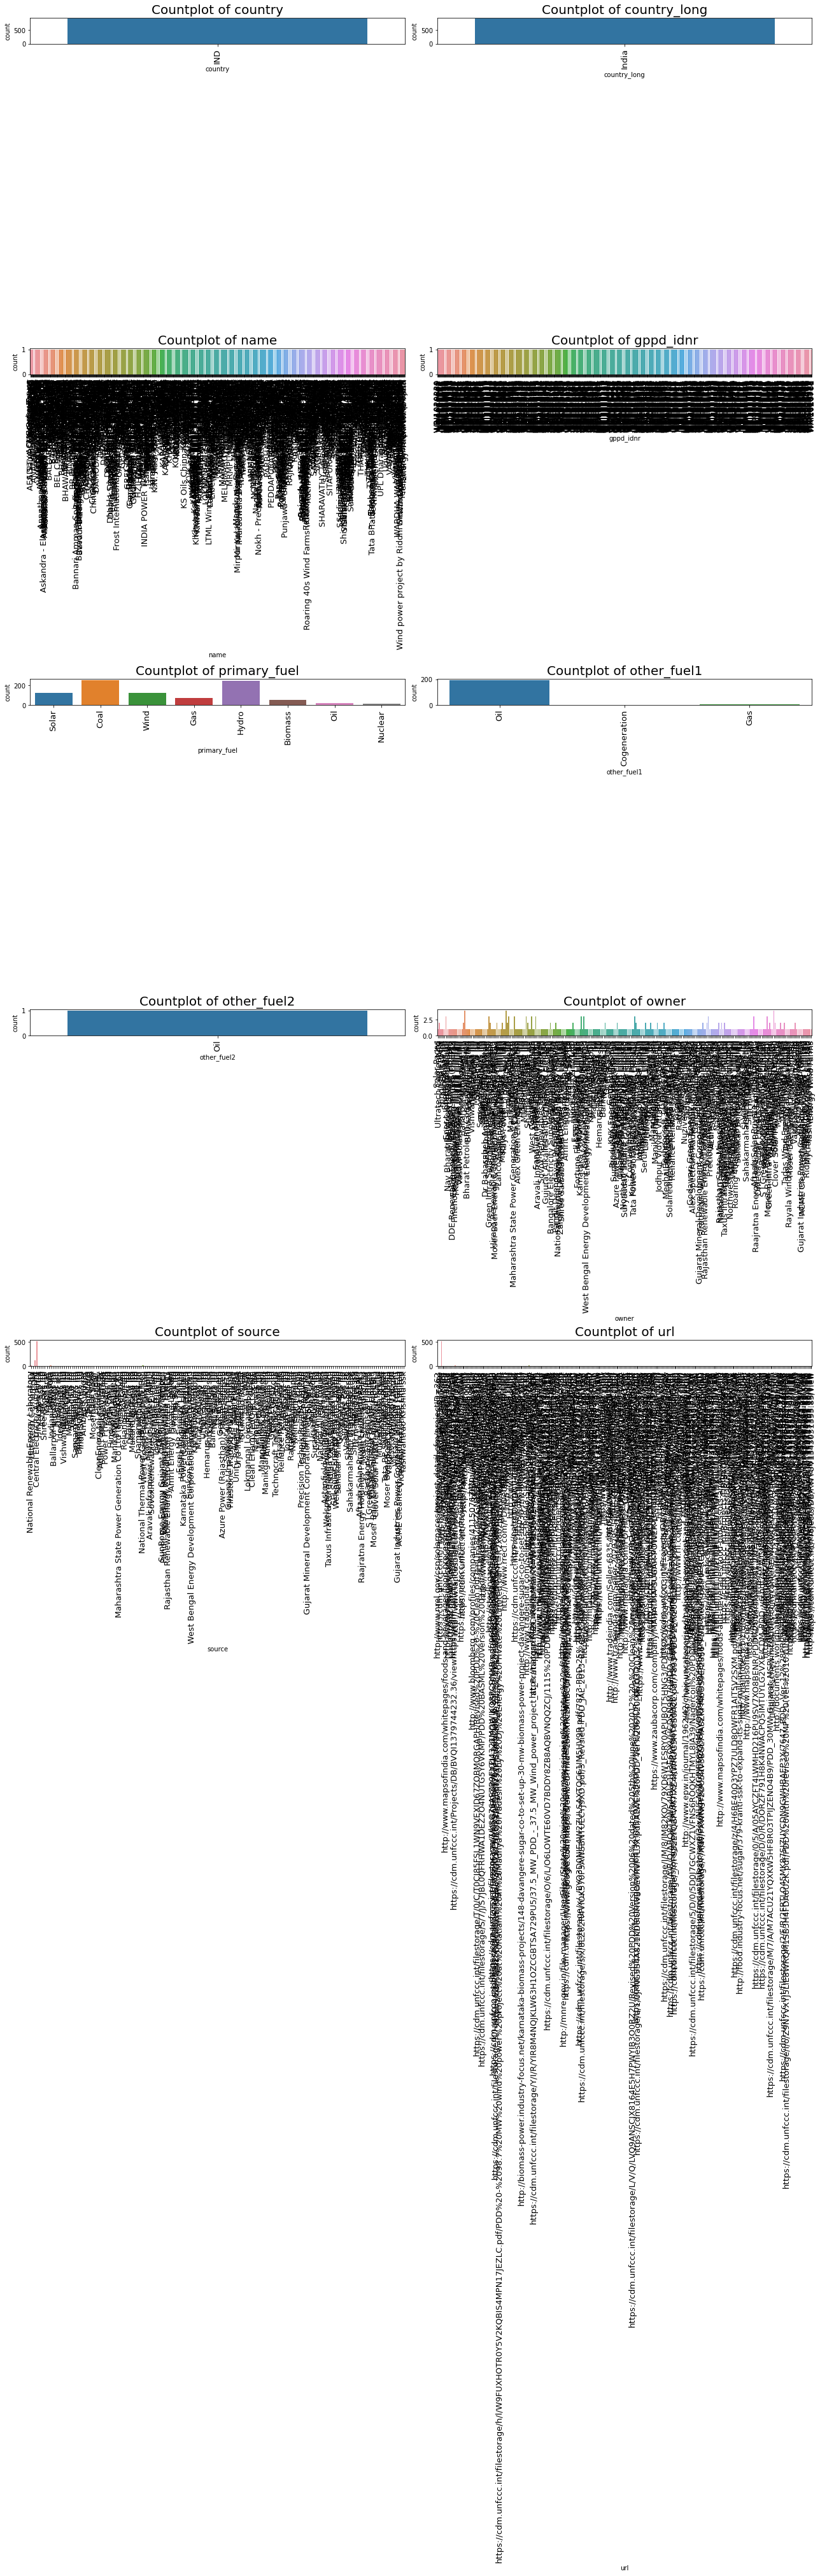

In [16]:
plt.figure(figsize=(18,30))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

In [17]:
df.select_dtypes(exclude='object')

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,28.1839,73.2407,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,NaN
4,1800.0,21.9603,82.4091,NaN,2015.0,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,NaN,2016.0,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,NaN
903,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Cleaning

{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

In [19]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

In [20]:
Oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=Oe.fit_transform(df[column])
  return df

In [21]:
def preprocessing(df):
  df=df.copy()
  le=LabelEncoder()
  df['capacity_mw']=le.fit_transform(df['capacity_mw'])
  X=df.drop('primary_fuel',axis=1)
  y=df['primary_fuel']
  return X,y

In [22]:
X,y=preprocessing(df)

In [23]:
X

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,9,28.1839,73.2407,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,177,24.7663,74.6090,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,121,21.9038,69.3732,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,200,23.8712,91.3602,NaN,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,340,21.9603,82.4091,Oil,NaN,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,336,16.2949,77.3568,Oil,NaN,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,10,12.8932,78.1654,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,81,15.2758,75.5811,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,167,24.3500,73.7477,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
y

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 907, dtype: object

Checking Correlation

In [25]:
df.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,1.000000,0.051309,0.197129,NaN,0.304087,NaN,NaN,NaN,0.839094,0.844352,0.870620,0.886673,0.901918,NaN,NaN
latitude,0.051309,1.000000,0.036362,NaN,0.129902,NaN,NaN,NaN,0.060330,0.048610,0.041387,0.040568,0.040476,NaN,NaN
longitude,0.197129,0.036362,1.000000,NaN,0.121910,NaN,NaN,NaN,0.013511,0.022760,0.050732,0.048678,0.045599,NaN,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.304087,0.129902,0.121910,NaN,1.000000,NaN,NaN,NaN,0.160014,0.170363,0.193743,0.191367,0.193694,NaN,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,NaN,0.160014,NaN,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN,NaN
generation_gwh_2015,0.844352,0.048610,0.022760,NaN,0.170363,NaN,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

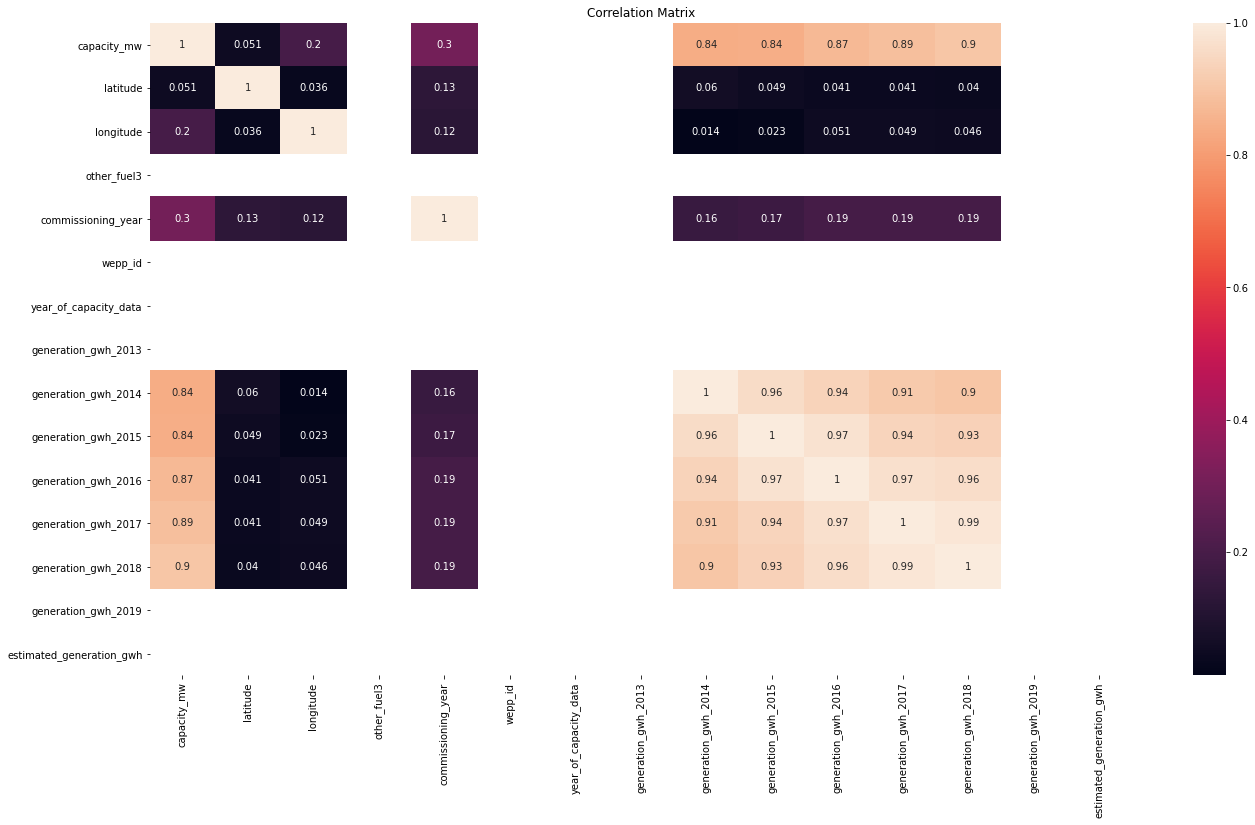

In [26]:
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

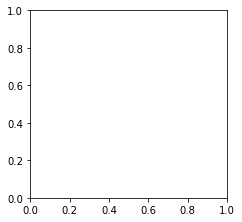

In [29]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

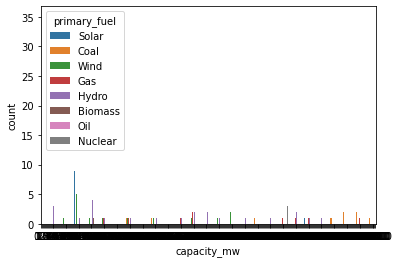

In [31]:
sns.countplot(x='capacity_mw',hue='primary_fuel',data=df)

Checking Skewness

In [32]:
df.skew()

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [34]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capacity_mw'>

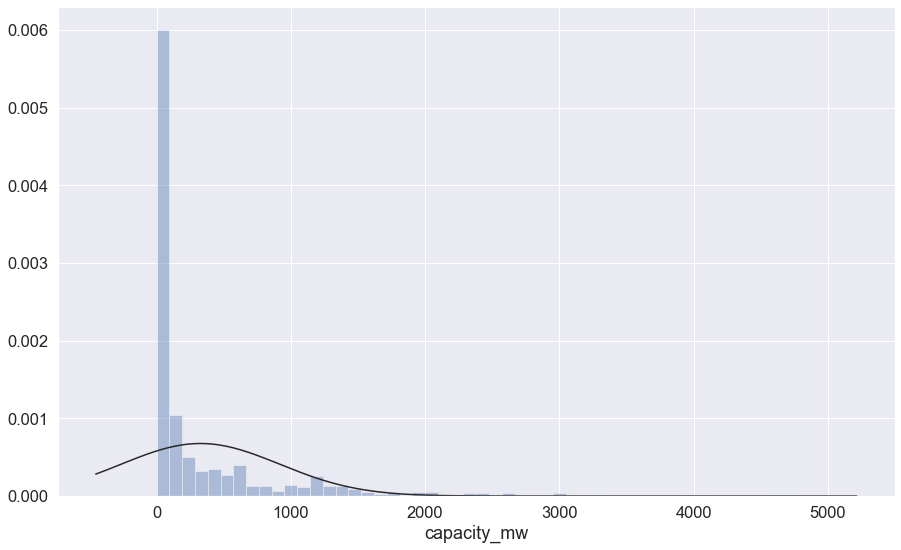

In [36]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.capacity_mw, kde=False, fit=norm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Solar'

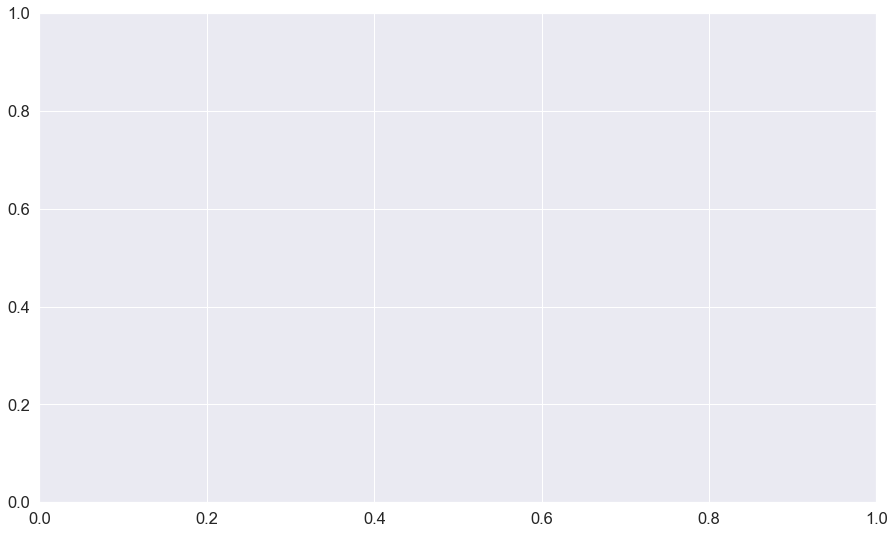

In [37]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.primary_fuel, kde=False, fit=norm)

In [38]:
df['capacity_mw'].nunique()

361

In [39]:
df['primary_fuel'].nunique()

8

In [40]:
df_final=pd.get_dummies(df.drop(['capacity_mw','primary_fuel'],axis=1),drop_first=True)

In [41]:
df_final.head()

,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,28.1839,73.2407,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,23.8712,91.3602,NaN,2004.0,NaN,2019.0,NaN,617.789264,843.747,886.004428,...,0,0,0,0,0,0,0,0,0,1
4,21.9603,82.4091,NaN,2015.0,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,...,0,0,0,0,0,0,0,0,0,1


In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform

In [43]:
X = df.iloc[:, 1: 12].values
y = df.iloc[:, 12].values

In [44]:
X

array([['India', 'ACME Solar Tower', 'WRI1020239', ..., nan, nan, 2011.0],
       ['India', 'ADITYA CEMENT WORKS', 'WRI1019881', ..., nan, nan, nan],
       ['India', 'AES Saurashtra Windfarms', 'WRI1026669', ..., nan, nan,
        nan],
       ...,
       ['India', 'Yelisirur wind power project', 'WRI1026776', ..., nan,
        nan, nan],
       ['India', 'ZAWAR MINES', 'WRI1019901', ..., nan, nan, nan],
       ['India', 'iEnergy Theni Wind Farm', 'WRI1026761', ..., nan, nan,
        nan]], dtype=object)

In [45]:
y

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'Hindustan Pvt lt', nan, 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', nan, nan, 'Ultratech Cement ltd',
       'Ener-t International Ltd.', 'Nav Bharat Buildcon Private Limited',
       nan, 'MEIL Green Power Limited', nan, 'Madras Cement Limited', nan,
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', nan, 'Indian Power ltd', nan,
       nan, nan, nan, nan, nan, 'Ballarpur Industries ltd',
       'Jk Cement ltd', nan, nan, nan, nan, nan, nan, nan,
       'India Ltd icl)', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'Bharat Petroleum Corporation Limited', 'B

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [48]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
}

In [49]:
param={
    'boosting_type': ['gbdt','dart','gross','rf'],
    'n_estimators':[100,500],
    'learning_rate':[0.1,0.01,0.001],
    'importance_type': ['split','gain'],
}

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

Model Saving

In [57]:
import pickle
filename = "Global Power_Prediction.pkl" 
pickle.dump(lr,open("Global Power_Prediction.pkl","wb"))

In [59]:
import warnings 
warnings.filterwarnings("ignore")